# 5. Klasyfikacja 


Zadanie klasyfikacji polega na zbudowaniu modelu $f$, który przypisuje obserwacjom $\vec{x}$ wartość nominalną (etykietę klasy). Jeżeli etykiety klas ponumerujemy kolejnymi liczbami całkowitymi, wówczas problem klasyfikacji sprowadza się do znalezienia transformacji

$$ f(\vec{x}) = y, \quad \text{gdzie} \quad y=0,1, 2, 3, \ldots $$

Przykładowo mając zbiór danych zawierający wyniki badań pacjentów (np. pomiarów temperatury, ciśnienie krwi, itp.) możemy zbudować model klasyfikacji, który podzieli badanych na dwie grupy: chorych (y=0) i zdrowych (y=1). 

Celem tych zajęć jest poznanie najważniejszych metod klasyfikacji, sposobu ich konfiguracji oraz demonstracja problemu przeuczenia modelu klasyfikacji. 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Zbiór danych Wine

Wczytajmy zbiór danych Wine, który zawiera pomiary opisujące wina pochodzące z 3 regionów Włoch. Każdy przypadek opisany jest zestawem 13 cech. Zadaniem jest, w oparciu o te dane, zbudowanie modelu, który będzie przewidywał  rodzaj wina. Wczytajmy zbiór danych Wine do tablicy NumPy.

In [ ]:
from sklearn import datasets

wine = datasets.load_wine()

print('Ilość zmiennych: ', wine.data.shape[1])
print('Nazwy zmiennych: ', wine.feature_names)
print('Etykiety klas: ', wine.target_names)
print('Wartości wyjściowe: ', np.unique(wine.target))
print('Ilość klas: ', len(np.unique(wine.target)))
print('Ilość przypadków: ', wine.data.shape[0])

Dane zawierają 178 przypadków, opisanych 13 cechami. Każde wino jest przypisane do jednej z 3 klas. 
Dokładny opis danych zawarty jest w polu  `DESCR` obiektu reprezentującego zbiór danych Wine

In [ ]:
print(wine.DESCR)

Dla uproszczenia problemu oraz w celach demonstracyjnych do klasyfikacji wybierzmy tylko 2 pierwsze zmienne. 

In [ ]:
data = wine.data[:, :2]
target = wine.target
feature_names = wine.feature_names[:2]
target_names = wine.target_names

print('Kształt danych treningowych: ', data.shape)
print('Nazwy wybranych zmiennych: ', feature_names)


Wykreślmy wykres rozrzutu aby zobaczyć rozkład przypadków z 3 grup.


In [ ]:
for i in [0, 1, 2]:
    plt.scatter(data[target==i, 0], data[target==i, 1])
    
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(target_names)

Wykres rozrzutu pokazuje, że 3 grupy obiektów są wyraźnie zgrupowane w różnych obszarach, jednak spora ilość przypadków leży w obszarach nakrywania się klas. Spróbujmy zbudować klasyfikator, który spróbuje odkryć regułę pozwalającą przewidywać klasę wina. Na początek użyjemy drzewa decyzyjnego.

## Drzewo decyzyjne

Jedną z ważniejszych metod klasyfikacji są drzewa decyzyjne. Dopasowanie modelu polega na zbudowaniu drzewa, którego węzły dzielą wartości poszczególnych zmiennych starając się rozdzielić jak najlepiej (zgodnie z pewnym kryterium podziału) obserwacje należące do różnych klas. Metoda buduje drzewo poczynając od korzenia, tworząc pierwszy podział danych wzdłuż zmiennej, która najlepiej spełnia kryterium podziału (np. czystość klas w uzyskanych po podziale gałęziach). Następnie, przypadki, które przypisane są do poszczególnych gałęzi są dzielone względem kolejnej zmiennej, tworząc kolejny węzeł drzewa. Rozrost może być kontynuowany aż do momentu, gdy w końcowych węzłach (liściach) znajdą się obserwacje przypisane tylko do jednej klasy. Klasyfikacja nowego wektora polega na podążaniu od korzenia do liścia zgodnie z podziałami zapisanymi w węzłach. Wówczas obserwacja otrzymuje etykietę zgodną z etykietą przypadków zebranych w liściu do którego trafimy.
Przykładowe drzewo decyzyjne przestawione jest na poniższym obrazku.


<div>
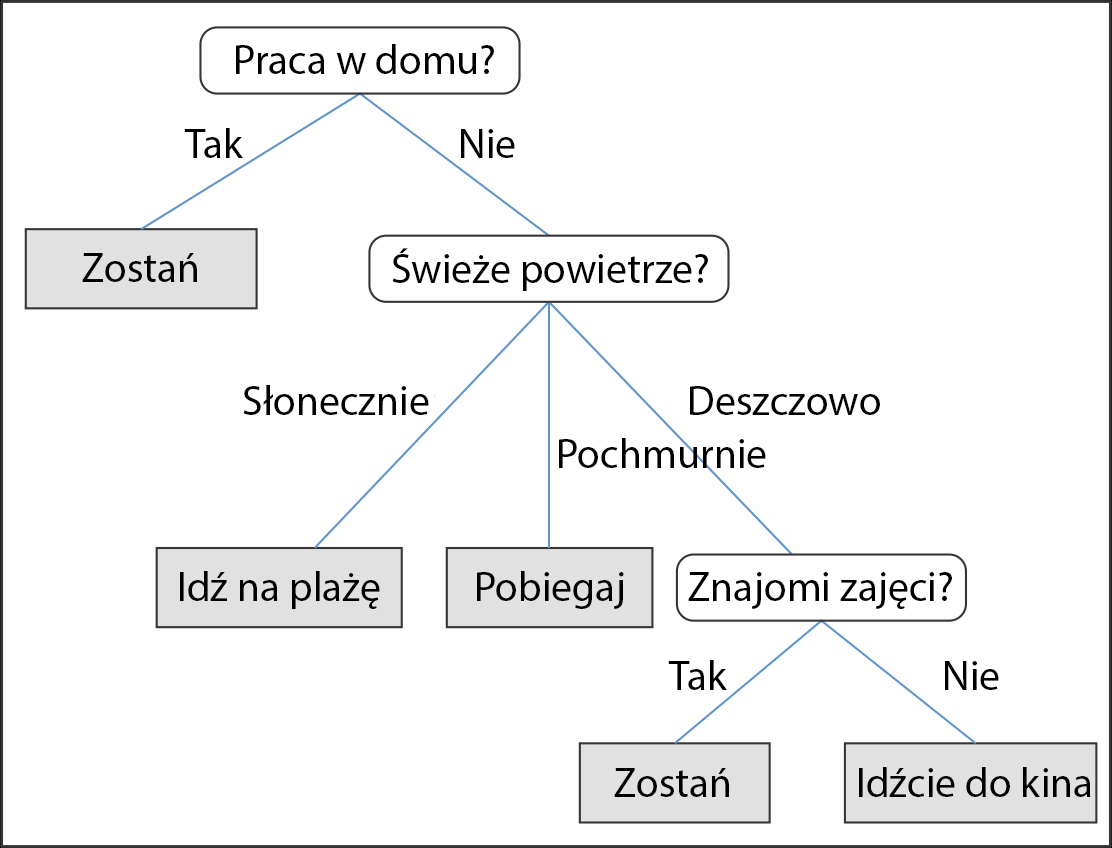
</div>

Poniżej znajduje się przykład użycia drzewa decyzyjnego z pakietu scikit-learn. Schemat postępowania jest taki sam jak dla regresji liniowej, najpierw budujemy model w oparciu o dane treningowe metodą `fit` a następnie możemy przeprowadzić predykcję za pomocą metody `predict`


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(data , target)

# nowy pomiar
x_new = [ 14.0, 3.0 ] 

predicted = clf.predict( [ x_new ] )

print('Nowa obserwacja ', x_new, 'przypisana została do klasy ', predicted[0])

Zobaczmy jaka jest skuteczność modelu w klasyfikacji całego zbioru danych. Podstawową miarą oceny skuteczności jest średnia liczba poprawnie klasyfikowanych obserwacji. Zdefiniujmy funkcję `accuracy_score`, które zwróci miarę poprawności.

In [ ]:
def accuracy_score(target, predicted):
   return np.mean(target == predicted)


target_predicted = clf.predict( data )
print('Poprawność klasyfikacji %.2f' % accuracy_score(target, target_predicted))

100 procent skuteczności! Wszystkie obserwacje ze zbioru danych zostały sklasyfikowane zgodnie z przypisanymi im etykietami. Wygląda na to, że dokonaliśmy przeuczenia a model dopasował się do szumu. Nasz model trenowaliśmy oraz testowaliśmy na tym samym zbiorze danych. Innymi słowy ocenialiśmy go nie sprawdzając jak dobrze model generalizuje, czyli jaka jest jego skuteczność na nowych danych, które nie posłużyły do zbudowania modelu.

Bardziej rzetelny pomiar poprawności otrzymamy wykonując predykcje na osobnym zbiorze testowym. Podzielmy więc zbiór danych na 2 części, treningową i testową, w proporcji 70%-30%.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.3, random_state=13)

print(len(x_train),' przypadków treningowych\n',
      len(x_test),' przypadków testowych\n', )

Zbudujmy drzewo na zbiorze treningowym i oceńmy skuteczność na zbiorze testowym

In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train, y_train)

predicted_test = clf.predict(x_test)
predicted_train = clf.predict(x_train)

print('Poprawność klasyfikacji (test )   %.2f' % (accuracy_score(y_test, predicted_test)))
print('Poprawność klasyfikacji (train)   %.2f' % (accuracy_score(y_train, predicted_train)))

Wynik na zbiorze testowym jest zdecydowanie gorszy, więc model najprawdopodobniej jest zanadto dopasowany do danych i ma niską zdolność do uogólniania. Zobaczmy jak złożone drzewo decyzyjne powstało. 

In [ ]:
print('Głebokość drzea :', clf.tree_.max_depth)
print(tree.export_text(clf, feature_names=feature_names))

Drzewo ma głębokość 11 a utworzone reguły dzielą bezbłędnie wszystkie przypadki treningowe, nawet przypadki, które są szumem. Ograniczyć efekt przeuczenia można przycinając drzewo lub nie pozwalając jego rozrost do takiego poziomu. Zbudujmy teraz drzewo o głębokości 2.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)

predicted_test = clf.predict(x_test)
predicted_train = clf.predict(x_train)

print('Poprawność klasyfikacji (test)   %.2f' % (accuracy_score(y_test, predicted_test)))
print('Poprawność klasyfikacji (train)   %.2f' % (accuracy_score(y_train, predicted_train)))

Poprawność wzrosła do 76% na zbiorze testowym, zaś na zbiorze treningowym nie mamy już 100%. Model jest o wiele prostszy (mam mniej reguł) a uzyskuje lepsze wyniki. 

Oto jak wyglądają reguły dzielące dane

In [ ]:
print(tree.export_text(clf, feature_names=feature_names))

Drzewo można też zwizualizować w postaci graficznej, jednak do uruchomienia poniższej komórki niezbędne jest zainstalowanie programu Graphviz oraz pakietu `pydotplus`. W przypadku problemów z wyświetleniem wyniku działania poniższego kodu [tutaj znajdziesz gotowy obrazek.](https://www.fizyka.umk.pl/~grochu/wdm/files/wine_tree_d2.png)

In [ ]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=feature_names, class_names=[ '0', '1', '2'], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


Ponieważ używamy 2 zmiennych możemy spróbować zwizualizaować granice decyzji utworzone przez drzewo decyzyjne. W tum celu zdefiniujmy funkcję pomocniczą `plot_decision_regions`. 



In [ ]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Funkcja rysująca granice decyzyjne klasyfikatora dla danych 2D zaczerpnięta z: 
# https://github.com/rasbt/python-machine-learning-book/blob/master/code/optional-py-scripts/ch03.py

def plot_decision_regions(X, y, classifier, test_data=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_data:
        # plot all examples
        X_test, y_test = test_data

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Oto jak wykłada podział danych za pomocą naszego drzewa o głębokości 2

In [ ]:
plot_decision_regions(X=x_train, y=y_train, classifier=clf)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Zobaczmy jeszcze jak wygląda sytuacja dla drzewa przeuczonego.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=11)
clf.fit(x_train, y_train)

plot_decision_regions(X=x_train, y=y_train, classifier=clf)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Granice decyzji w tym przypadku są bardzo złożone i dzielą przestrzeń w ten sposób aby wszystkie wektory treningowe były poprawnie klasyfikowane. Kosztem jest brak generalizacji i mała skuteczność klasyfikatora na nowych danych. 

### Głębokość drzewa a przeuczenie

Przyjrzyjmy się dokładniej jaki wpływ ma zmiana głębokości drzewa na poprawność klasyfikacji zbioru Wine i spróbujmy znaleźć najbardziej optymalną głębokość. 


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [1,2,3,4,5,6,7,8,9,10,15]

trainAcc = []
testAcc = []

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=14)      
    clf = clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()



Wykres pokazuje, że wraz ze wzrostem głębokości drzewa poprawność na zbiorze treningowym się zwiększa aż do osiągnięcia 100% skuteczności. Poprawność na zbiorze testowym również początkowo rośnie jednak po przekroczeniu  pewnej wartości zaczyna spadać. To znak, że drzewo o tej głębokości stało się zbyt złożone. Najlepszy wynik 85% uzyskujemy w tym przypadku dla drzewa o głębokości 3. 

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=14)
clf.fit(x_train, y_train)

print(tree.export_text(clf, feature_names=feature_names))
                       
plot_decision_regions(X=x_train, y=y_train, classifier=clf)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Standaryzacja danych

W przypadku drzew decyzyjnych nie musimy troszczyć się o skale poszczególnych zmiennych, gdyż są one dzielone  niezależnie od siebie. Drzewa decyzyjne świetnie też radzą sobie w przypadku, gdy zmienne wejściowe mają wartości nominalne. W przypadku jednak wielu metod klasyfikacji musimy zadbać o to aby zmienne posiadały wartości w odpowiednich (porównywalnych ze sobą) zakresach. Przykładowo, metody obliczające odległości pomiędzy obserwacjami są czułe na zakresy wartości zmiennych, dlatego przed przystąpieniem do treningu należy dane odpowiednio unormować.

__Standaryzacja__ to liniowa transformacja danych, polegająca na wyśrodkowaniu danych (ustalenie wartości średniej zmiennych na 0) oraz przeskalowaniu zakresu zmiennych do takiej wartości aby odchylenie standardowe zmiennych miało wartość 1.

Dokonajmy standaryzacji danych treningowych.

In [ ]:
dt_mean = np.mean(x_train, axis=0)
dt_std = np.std(x_train, axis=0)

x_train_std = (x_train - dt_mean)/dt_std

plt.boxplot(x_train_std, vert=False, labels=feature_names);

Wykres skrzyniowy prezentuje rozkład nowych danych, obie zmienne mieszczą się teraz w zbliżonym zakresie wartości. 

Zbiór testowy również wystandaryzujmy, jednak należy pamiętać aby użyć tych samych parametrów transformacji jak dla zbioru treningowego (`dt_mean`i `dt_std`). Jeżeli standaryzacja byłaby zrobiona z użyciem innych parametrów, zbiór testowy stałby się niespójny ze zbiorem treningowym. 

In [ ]:
x_test_std = (x_test - dt_mean)/dt_std

## kNN - k najbliższych sąsiadów

Metoda k najbliższych sąsiadów (kNN) przypisuje obserwacji $\vec{x}$ etykietę klasy taką jaką posiada większość spośród $k$ najbliższych obserwacji ze zbioru treningowego. W szczególnym wypadku dla $k=1$ obserwacji przypisujemy taką samą etykietę jaką posiada najbliższy wektor. W przypadku remisów (gdy równa ilość sąsiadów należy do każdej z klas) wynik można rozstrzygnąć w drodze losowania.

<div>
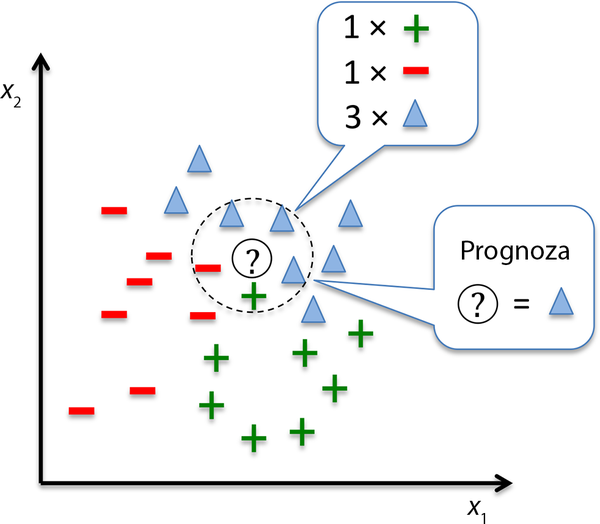
</div>

Oprócz parametru $k$ określającego ilość sąsiadów drugim ważnym parametrem metody jest dobór metryki służącej do wyznaczania odległości. Domyślnie stosuje się odległość Euklidesową, która jest szczególnym przypadkiem metryki Minkowskiego dla $p=2$

\begin{equation*}
\textrm{Minkowski distance}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^p \bigg]^{\frac{1}{p}}
\end{equation*}

Zbudujmy model kNN dla danych Wine. Trening (`fit`) sprowadza się do zapamiętania zbioru treningowego, dlatego kNN należy do metod leniwych. Dopiero w momencie predykcji (`predict`) odbywa się wyszukiwanie najbliższych sąsiadów i ustalenie etykiety wyjściowej.

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

clf = clf.fit(x_train_std, y_train)

prediction = clf.predict(x_test_std)

print('Poprawność klasyfikacji %.2f' % accuracy_score(prediction, y_test))

Zobaczmy jak wyglądają granice decyzji modelu kNN

In [ ]:
plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Gdy użyjemy większej liczby sąsiadów granice decyzyjne wygładzają się, pojedyncze przypadki leżące daleko od centrów rozkładów swoich klas nie mają wówczas wpływu na wynik klasyfikacji, gdyż stanowią mniejszość wśród sąsiadujących wektorów z przeciwnej klasy.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2)
clf = clf.fit(x_train_std, y_train)
prediction = clf.predict(x_test_std)

print('Poprawność klasyfikacji %.2f' % accuracy_score(prediction, y_test))

plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Z drugiej strony, dla `n_neighbors=1` przestrzeń wejściowa zostaje podzielona na strefy wpływu przez każdy wektor treningowy a granica decyzji przebiega w równej odległości od przypadków z różnych klas. Poprawność na zbiorze treningowym wynosi wówczas 100%, gdyż każdy wektor ma siebie samego jako najbliższego sąsiada. 

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
clf = clf.fit(x_train_std, y_train)

prediction_test = clf.predict(x_test_std)
prediction_train = clf.predict(x_train_std)

print('Poprawność klasyfikacji (trening) %.2f' % accuracy_score(prediction_train, y_train))
print('Poprawność klasyfikacji (test)    %.2f' % accuracy_score(prediction_test, y_test))

plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Zobaczmy jak zmienia się poprawność klasyfikacji zbioru Wine w zależności od liczby sąsiadów 

In [ ]:
numNeighbors = [1,  2, 3,  4, 5, 6, 7, 8, 9, 10, 13]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf = clf.fit(x_train_std, y_train)
    y_pred_train = clf.predict(x_train_std)
    y_pred_test = clf.predict(x_test_std)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))


plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

Wygląda na to, że w tym wypadku najlepszy wynik uzyskujemy dla 4 sąsiadów. 

## Regresja logistyczna

Regresja logistyczna jest klasyfikatorem liniowym tzn. tworzy liniową hiper-płaszczyznę dzielącą przestrzeń cech na dwie części. W przypadku 2 zmiennych granicą decyzyjną jest linia $w_1 x_1 + w_2 x_2 + w_0 = 0$.

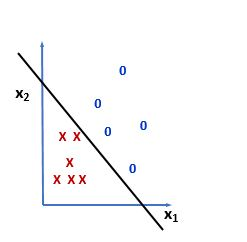

W przypadku $n$ zmiennych płaszczyzna jest definiowana w następujący sposób 
$$ \sum_{i=0}^n w_i x_i+ w_0 = w ^Tx = 0 $$. 

Realizowana jest więc klasyfikacja do 2 grup  w zależności po której stronie płaszczyzny znajduje się obserwacja.

Model regresji logistycznej dopasowuje funkcję logistyczną do rozkładu danych zgodnie z poniższym wzorem
\begin{equation*}
f(x) = \sigma(w^Tx + w_0)
\end{equation*}

gdzie $\sigma$ jest funkcją logistyczną (sigmoidalną) 

$$ \sigma(z) = \frac{1}{1 + \exp^{-z}}$$

Funkcja $\sigma$ zwraca wartości z zakresu od 0 do 1. Zobaczmy jak wygląda jej przebieg.



In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.arange(-7, 7, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.grid('on')
plt.show()

Wartość $f(x)$ zwracaną z modelu możn interpretować jako prawdopodobieństwo przynależenia wektora $x$ do klasy 1.

\begin{equation*}
P(y=1|x) = \frac{1}{1 + \exp^{-w^Tx - b}} = \sigma(w^Tx + b)
\end{equation*}

Zadanie polega na znalezieniu takiego zestawu parametrów $w$ i $w_0$, które minimalizują błąd dopasowania funkcji logistycznej do wartości wyjściowych 0 i 1 (kodujących etykiety dwóch klas). Dokonuje się tego w podobny sposób jak w przypadku regresji liniowej poprzez minimalizację funkcji kosztu, jednak w przypadku klasyfikacji, gdy modelowanymi wartościami jest rozkład wartości binarnych (0, 1) odpowiednią funkcją kosztu jest entropia krzyżowa (Cross Entropy)

\begin{equation*}
J_{CE} = - \sum_{i=1}^N \left( y_i \log f(x_i) + (1-y_i) \log (1 - f(x_i)) \right)
\end{equation*}

Jest to miara podobieństwa rozkładu wartości oczekiwanych $y_i$ względem rozkładu wyjść z modelu $f(x_i)$ i osiąga minimum $J=0$, gdy oba rozkłady wartości binarnych są identyczne.

Pełna forma modelu regresji logistycznej, którą zastosujemy uwzględnia również czynnik regularyzacyjny z normą $L_2$

$$J = J_{CE} + \frac{1}{C} ||w||^2$$

gdzie współczynnik $C>0$ określa siłę wpływu czynnika regularyzacji na wynik. Im mniejsza wartość współczynnika $C$ tym większa siła regularyzacji, która tak samo jak w regresji brzegowej wymusza zmniejszanie wartości bezwzględnej wag $w_i$. 

Wykorzystajmy algorytm regresji logistycznej dostępny w pakiecie scikit-learn do klasyfikacji danych Wine

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf = clf.fit(x_train_std, y_train);
prediction = clf.predict(x_test_std)

print('Poprawność klasyfikacji %.2f' % accuracy_score(prediction, y_test))

In [ ]:
plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


W naszym przypadku mamy 3 klasy, więc regresja liniowa tworzy osobny model $P(y=c_1|x)$, $P(y=c_2|x)$ i 
$P(y=c_3|x)$ dla każdej z klas. W wyniku tego przestrzeń jest podzielona trzema liniami prostymi.

Zobaczmy w jaki sposób wpływa dobór parametru regularyzacji $C$ na poprawność klasyfikacji danych Wine

In [ ]:

C = [  0.01, 0.04, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100]


trainAcc = []
testAcc = []

for param in C:
    clf = LogisticRegression(C=param, solver='lbfgs', multi_class='ovr')
    clf = clf.fit(x_train_std, y_train)
    y_pred_train = clf.predict(x_train_std)
    y_pred_test = clf.predict(x_test_std)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))

    
plt.plot(C, trainAcc, 'ro-', C, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()


W tym wypadku wartości $C = 0.05$ dała największą poprawność 80% na zbiorze testowym, jednak należy zauważyć, że dla większych wartości $C$, gdzie wpływ regularyzacji zanika, poprawność jest na niewiele mniejszym poziomie 77%. W przypadku bardziej złożonych problemów, gdy nie istnieje wyraźny liniowy podział między klasami, zanik regularyzacji będzie owocował pogorszeniem poprawności.  

## SVM. Maszyna wektorów nośnych

Maszyna wektorów nośnych (support vector machine, SVM) również poszukuje dyskryminującej hiperpłaszczyzny dzielącej grupy przypadków na dwie klasy. Jednak w przypadku SVM szukane jest takie rozwiązanie, które maksymalizuje wielkość marginesu między hiperpłaszczyzną decyzyjną a *wektorami nośnymi*, tj. takimi wektorami treningowymi, które położone są w pobliżu granicy decyzyjnej. Koncepcja ta zobrazowana jest na poniższym obrazku.



<div>
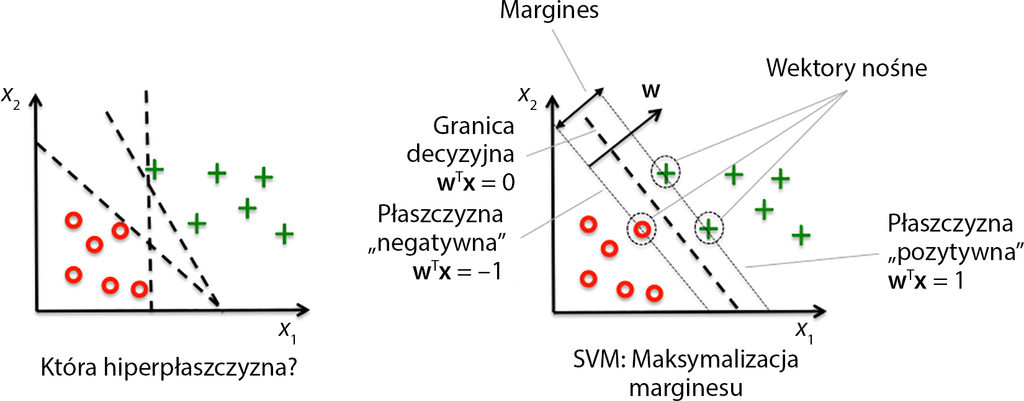
</div>

Spośród wszystkich możliwych podziałów za pomocą powierzchni preferujemy te o największym marginesie, gdyż powinny one gwarantować generalizację.

Szczegóły działania tego modelu oraz jesgo procesu optymalizacji wykraczają poza zakres tego laboratorium ale warto odnotować, że w ogólności rozwiązanie SVM polega na znalezieniu takich wag $w$ i $w_0$, które minimalizują wyrażenie
\begin{eqnarray*}
&&\frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{przy zachowaniu } && \forall i: y_i\bigg[w^T \phi(x_i) + w_0\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

Funkcja $\phi$ jest funkcją jądrową i w przypadku dyskryminacji liniowej możemy potraktować ją jak funkcję jednostkową. Taki model nazywamy **liniowym SVM** a wyrażenie $w^T x_i + w_0 = 0 $ definiuje wówczas powierzchnię dyskryminującą.  

Parametr $C$ ma wpływ na szerokość marginesu i pełni podobną rolę do parametru regularyzacyjnego regresji logistycznej. Poniższy obrazek prezentuje wpływ tego parametru na dobór płaszczyzny separującej. 

<div>
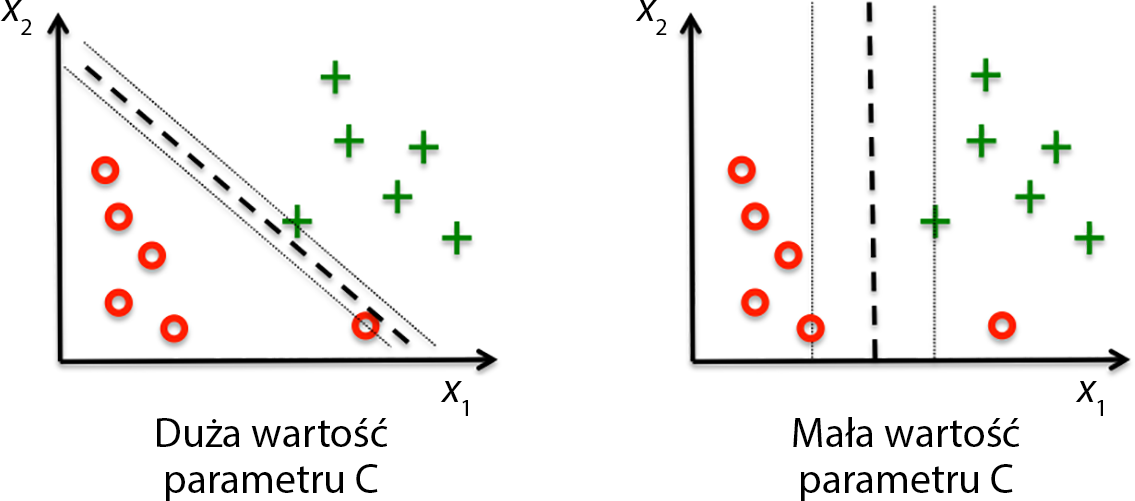
</div>

Im większa wartość $C$ tym większa jest kara za błędy klasyfikacji. SVM preferuje wówczas rozwiązania o mniejszym marginesie ale z mniejszą liczbą błędów (rysunek lewy). Dla mniejszych wartości $C$ (większa regularyzacja)  dopuszczane są błędy klasyfikacji ale owocuje to zwiększeniem marginesu (rysunek prawy).

Pomimo tego, że toria stojąca za tym algorytmem wydawać się może skompilowana to użycie tego klasyfikatora nie różni się wiele od poprzednich przykładów. Spróbujmy przeprowadzić klasyfikację win za pomocą liniowego SVM. Klasa SVC jest implementacją tego klasyfikatora w scikit-learn. Parametr `kernel='linear'` wybiera liniową funkcję jądrową. 

In [ ]:
from sklearn.svm import SVC

clf =  SVC(kernel='linear')

clf = clf.fit(x_train_std, y_train);
prediction = clf.predict(x_test_std)

print('Poprawność klasyfikacji %.2f' % accuracy_score(prediction, y_test))

plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Uzyskany wynik jest porównywalny z regresją logistyczną. Podobnie jak w przypadku regresji logistycznej zobaczmy jaki wpływ na poprawność klasyfikacji ma dobór parametru $C$.

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 100]


trainAcc = []
testAcc = []

for param in C:
    clf =  SVC(C=param, kernel='linear')
    clf = clf.fit(x_train_std, y_train)
    y_pred_train = clf.predict(x_train_std)
    y_pred_test = clf.predict(x_test_std)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))

    
plt.plot(C, trainAcc, 'ro-', C, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

Tym razem dla $C=0.8$ otrzymaliśmy poprawność 82% trochę lepsza od najlepszego wyniku regresji logistycznej.

Generalnie możemy się spodziewać podobnych rezultatów dla SVM liniowego i regresji linowej. Regresja liniowa jest jednak bardziej czuła na odstające elementy zbioru danych gdzie SVM liniowy zwraca uwagę głownie na wektory położone w pobliżu granicy decyzyjnej. 

### SVM nielionwy

Liniowy SVM jak i regresja logistyczna są w stanie rozwiązać z dużą poprawnością problemy, które są liniowo separowane. W wielu sytuacjach lepszą separację uzyskamy stosując metody nieliniowe. Jedną z potężniejszych metod klasyfikacji jest właśnie SVM z zastosowaniem innych funkcji jądrowych niż liniowe.
Odpowiednia transformacja nieliniowa $\phi(\vec{x})$ zmiennych wejściowych tworzy obraz danych w wyżej wymiarowej przestrzeni, w której szansa znalezienia liniowej separacji rośnie. 
Demonstruje to poniższy obrazek, który przestawia w jaki sposób nieliniowa transformacja 2 wejściowych cech $x_1$, $x_2$ tworzy obraz w 3-wymiarowej przestrzeni $z_1$, $z_2$ i $z_3$, w której możliwe jest odseparowanie przypadków z obu klas za pomocą hiperpowierzchni. W przestrzeni wejściowej granica decyzyjna tworzy okrąg otaczający wewnętrzne punkty pierścienia. 


<div>
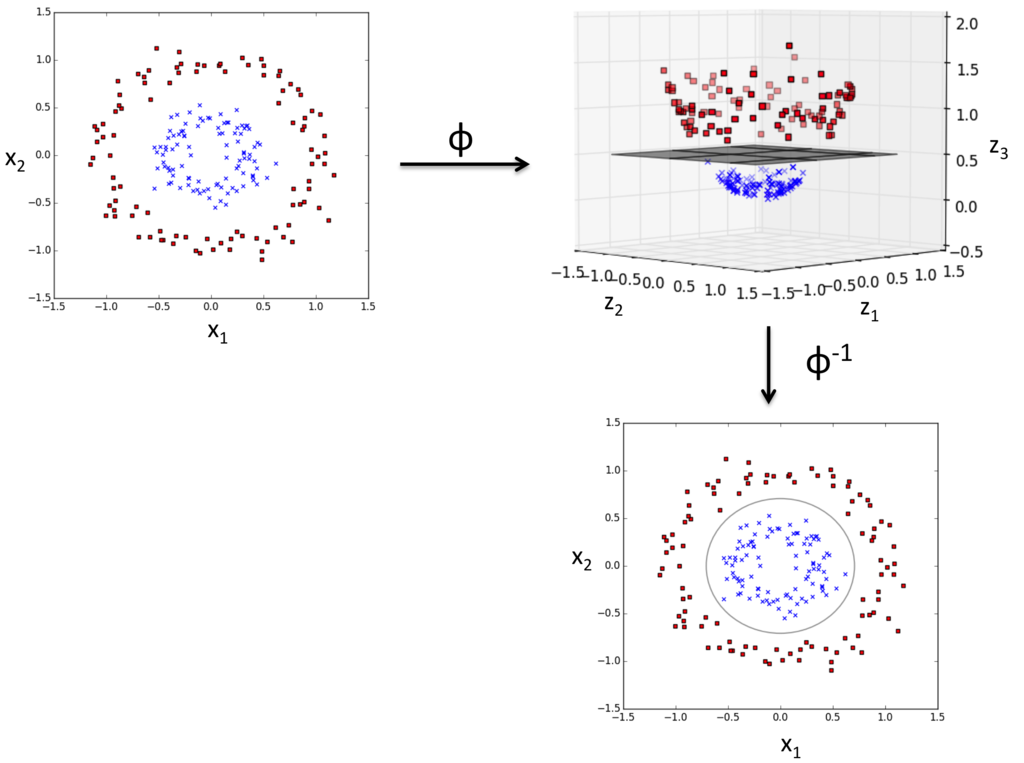
</div>

Najczęsciej stosowaną funkcją jądrową w SVMie jest funkcja Gusowska. Wystarczy ustawić parametr `kernel` klasyfikatora SVC na wartość `rbf`, czyli radialne funkcje bazowe (radial basis function).

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = SVC(kernel='rbf')

clf = clf.fit(x_train_std, y_train);
prediction = clf.predict(x_test_std)

print('Poprawność klasyfikacji %.2f' % accuracy_score(prediction, y_test))

Przyjrzyjmy się granicom decyzyjnym.

In [ ]:
plot_decision_regions(X=x_train_std, y=y_train, classifier=clf)
plt.xlabel(feature_names[0] + ' (standaryzowane)')
plt.ylabel(feature_names[1] + ' (standaryzowane)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Zobaczmy jak teraz zmienia się poprawność klasyfikacji wraz ze zmianą współczynnika $C$.

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.05, 0.1, 0.2, 0.6, 0.5, 1,  5, 10,  20, 50]

trainAcc = []
testAcc = []

for param in C:
    clf =  SVC(C=param, kernel='rbf')
    clf = clf.fit(x_train_std, y_train)
    y_pred_train = clf.predict(x_train_std)
    y_pred_test = clf.predict(x_test_std)
    trainAcc.append(accuracy_score(y_train, y_pred_train))
    testAcc.append(accuracy_score(y_test, y_pred_test))

    
plt.plot(C, trainAcc, 'ro-', C, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()


DLa parametru $C=5$ otrzymujemy bardzo dobry  wynik poprawności bliski 83%. 

## Zadanie

Powyższe ćwiczenia demonstrowały użycie klasyfikatorów na 2 pierwszych zmiennych zbioru danych Wine. 
Przeprowadź klasyfikację danych Wine z użyciem wszystkich 13 zmiennych. Nie zapomnij o wystandaryzowanuy danych. Podziel zbiór danych w stosunku 70% dane treningowe, 30% dane testowe i przeprowadź klasyfikację z użyciem następujących metod: drzewo decyzyjne, regresja liniowa, SVM z funkcją Gaussa, kNN. Spróbuj dobrać ręcznie tak parametry klasyfikatora aby uzyskać jak najlepszy wynik poprawności na zbiorze testowym. Przedstaw wyniki w postaci tabeli lub wykresu (np. słupkowego), gdzie zademonstrowane będą wybrane,  najlepsze wyniki dla każdego typu  klasyfikatora.